# PYTHON-13. Визуализация данных

Цели данного модуля:

Познакомиться с различными способами графического представления данных.

Освоить основные методы визуализации библиотек Matplotlib и Pandas.

Научиться настраивать диаграммы в Matplotlib для повышения их информативности.

Освоить основные методы визуализации библиотеки Seaborn.

Освоить базовые методы интерактивной визуализации и анимации библиотеки Plotly.

Научиться выбирать правильные методы визуализации для конкретных задач.

Основные типы визуализации:

линейный график; 
гистограмма; 
диаграмма рассеяния; 
коробчатая диаграмма; 
круговая диаграмма; 
столбчатая диаграмма; 
тепловая карта. 

## 3. Знакомимся с новыми данными: коронавирус

В этом модуле мы обсудим глобальную тему современности — новую коронавирусную инфекцию (Covid-19).

In [2]:
import pandas as pd 

covid_data = pd.read_csv('data/covid_data.csv')
display(covid_data.head())

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


Мы будем работать со следующими столбцами:

date — дата наблюдения;

province/state — наименование провинции/штата;

country — наименование страны;

confirmed — общее число зафиксированных случаев на указанный день;

deaths — общее число зафиксированных смертей на указанный день;

recovered — общее число выздоровлений на указанный день.

country_vaccinations — данные о процессе вакцинирования людей в 221 стране мира. (источник данных)

In [4]:
vaccinations_data = pd.read_csv('data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
display(vaccinations_data.head())

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


Данная таблица содержит следующие столбцы:

country — наименование страны;

date — дата наблюдения;

total_vaccinations — общее число введённых вакцин в стране на указанный день;

people_vaccinated — общее число привитых первым компонентом в стране на указанный день;

people_vaccinated_per_hundred — процент привитых первым компонентом в стране на указанный день (рассчитывается как );

people_fully_vaccinated — общее число привитых вторым компонентом в стране на указанный день (первый компонент уже был введён им ранее);

people_fully_vaccinated_per_hundred — процент привитых вторым компонентом в стране на указанный день (рассчитывается как );

daily_vaccination — ежедневная вакцинация (число вакцинированных в указанный день);

vaccines — комбинации вакцин, используемые в стране.

Предобработка данных

Группируем таблицу по дате и названию страны и рассчитываем суммарные показатели по всем регионам. Тем самым переходим от данных по регионам к данным по странам:

In [6]:
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

display(covid_data.head())

,date,country,confirmed,deaths,recovered
0,01/01/2021,Afghanistan,51526.0,2191.0,41727.0
1,01/01/2021,Albania,58316.0,1181.0,33634.0
2,01/01/2021,Algeria,99897.0,2762.0,67395.0
3,01/01/2021,Andorra,8117.0,84.0,7463.0
4,01/01/2021,Angola,17568.0,405.0,11146.0


Преобразуем даты в формат datetime с помощью функции pd.to_datetime():

In [8]:
covid_data['date'] = pd.to_datetime(covid_data['date'])
display(covid_data.head())

,date,country,confirmed,deaths,recovered
0,2021-01-01,Afghanistan,51526.0,2191.0,41727.0
1,2021-01-01,Albania,58316.0,1181.0,33634.0
2,2021-01-01,Algeria,99897.0,2762.0,67395.0
3,2021-01-01,Andorra,8117.0,84.0,7463.0
4,2021-01-01,Angola,17568.0,405.0,11146.0


Создадим признак больных на данный момент (active). Для этого вычтем из общего числа зафиксированных случаев число смертей и число выздоровевших пациентов:

In [10]:
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']
display(covid_data.head())

,date,country,confirmed,deaths,recovered,active
0,2021-01-01,Afghanistan,51526.0,2191.0,41727.0,7608.0
1,2021-01-01,Albania,58316.0,1181.0,33634.0,23501.0
2,2021-01-01,Algeria,99897.0,2762.0,67395.0,29740.0
3,2021-01-01,Andorra,8117.0,84.0,7463.0,570.0
4,2021-01-01,Angola,17568.0,405.0,11146.0,6017.0


Создадим признак ежедневного прироста числа заболевших, умерших и выздоровевших людей. Для этого отсортируем данные по названиям стран, а затем по датам. После этого произведём группировку по странам и рассчитаем разницу между «вчера и сегодня» с помощью метода diff():

In [13]:
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
display(covid_data.head())

,date,country,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
11337,2020-02-24,Afghanistan,1.0,0.0,0.0,1.0,NaN,NaN,NaN
11570,2020-02-25,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
11807,2020-02-26,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12051,2020-02-27,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0
12299,2020-02-28,Afghanistan,1.0,0.0,0.0,1.0,0.0,0.0,0.0


В таблице vaccinations_data достаточно будет преобразовать столбцы в формат datetime:

In [14]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

Задание 3.1
За какой период представлены данные в таблице covid_data? В качестве ответа введите даты в формате datetime (без указания времени).
Введите ответ в следующем формате (без пробелов): ГГГГ-ММ-ДД-ГГГГ-ММ-ДД

In [15]:
covid_data['date'].describe()

count                            86785
mean     2020-10-15 20:19:34.931151616
min                2020-01-22 00:00:00
25%                2020-06-25 00:00:00
50%                2020-10-17 00:00:00
75%                2021-02-07 00:00:00
max                2021-05-29 00:00:00
Name: date, dtype: object

In [17]:
print(f"Данные о заболеваемости предоставлены от {covid_data['date'].min()} до  {covid_data['date'].max()}")

Данные о заболеваемости предоставлены от 2020-01-22 00:00:00 до  2021-05-29 00:00:00


Задание 3.2
За какой период представлены данные в таблице vaccinations_data? В качестве ответа введите даты в формате datetime без указания времени.
Введите ответ в следующем формате (без пробелов): ГГГГ-ММ-ДД-ГГГГ-ММ-ДД

In [19]:
vaccinations_data['date'].describe()

count                            42795
mean     2021-05-21 12:12:46.182965248
min                2020-12-02 00:00:00
25%                2021-04-02 00:00:00
50%                2021-05-26 00:00:00
75%                2021-07-15 00:00:00
max                2021-09-06 00:00:00
Name: date, dtype: object

Задание 3.3
С помощью метода merge() объедините таблицы covid_data и vaccinations_data по столбцам date и country.
Тип объединения выставьте так, чтобы в результирующую таблицу попали только наблюдения за период, вычисленный в задании 3.1. То есть в результирующую таблицу должны попасть все записи из таблицы covid_data и из её пересечения с vaccinations_data, но не более. Результат объединения занесите в переменную covid_df.

In [20]:
covid_df = covid_data.merge(
    vaccinations_data,
    on=['date', 'country'],
    how='left'
)
print('Число строк: ', covid_df.shape[0])
print('Число столбцов: ', covid_df.shape[1])

Число строк:  86785
Число столбцов:  16


В получившейся в задании 3.3 таблице covid_df создайте признаки death_rate — общий процент смертей среди зафиксированных случаев (летальность) и recover_rate — общий процент случаев выздоровления. Данные характеристики рассчитайте как отношение числа смертей (deaths) и числа выздоровлений (recovered) к числу зафиксированных случаев (confirmed) и умножьте результаты на 100%.

In [21]:
covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
covid_df['recovery_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100


Задание 3.4
Какова максимальная летальность в США (United States) за весь период? Ответ округлите до второго знака после запятой.

In [23]:
covid_df[covid_df['country'] == 'United States']['death_rate'].max()

np.float64(7.18954248366013)

Задание 3.5
Чему равен средний процент выздоровевших в России (Russia)? Ответ округлите до второго знака после запятой.

In [26]:
covid_df[covid_df['country'] == 'Russia']['recovery_rate'].mean()

np.float64(67.06273489477655)

## 4. Графические возможности библиотеки Pandas

Дальнейшая работа будет проводиться с таблицей covid_df — результатом объединения таблиц covid_data и vaccinations_data.

Оказывается, за способами визуализации данных не нужно далеко ходить. Базовую (примитивную) визуализацию можно выполнить с помощью уже знакомой нам библиотеки Pandas. Функционал для создания основных типов графиков уже включён в библиотеку. С изучения возможностей Pandas мы и начнём наше погружение в программную визуализацию.

Примечание. Для визуализации Pandas использует библиотеку matplotlib, о которой мы поговорим в следующем юните. Если попробовать воспользоваться методами визуализации Pandas без предварительной установки matplotlib, вы получите ошибку ImportError. Для установки библиотеки используется стандартная команда, которую нужно выполнить в терминале:

### pip install matplotlib

или в ячейке ноутбука:

### ! pip install matplotlib

Базовая визуализация в Pandas

Основным методом для создания простейших графиков в Pandas является plot().

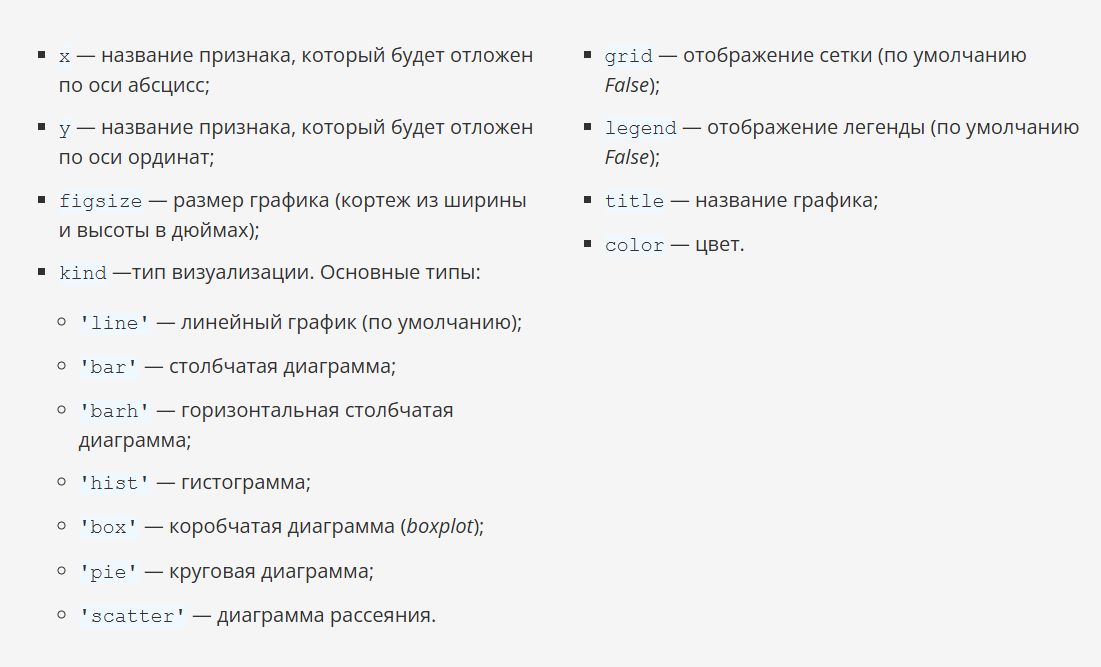

Давайте попрактикуемся в использовании метода plot().

Начнём с исследования заболеваемости коронавирусом во всём мире. Для этого первым делом отобразим, как менялось ежедневное число заболевших (daily_confirmed) во всём мире во времени. Далее сгруппируем таблицу по датам и подсчитаем суммарное число зафиксированных случаев по дням.

Теперь мы наконец можем построить график с помощью метода plot(). Будем использовать линейный график размером 12x4 (попробуйте взять другие числа, чтобы увидеть разницу). Подпишем график и отобразим сетку. Параметр lw (line width) отвечает за ширину линии для линейного графика.

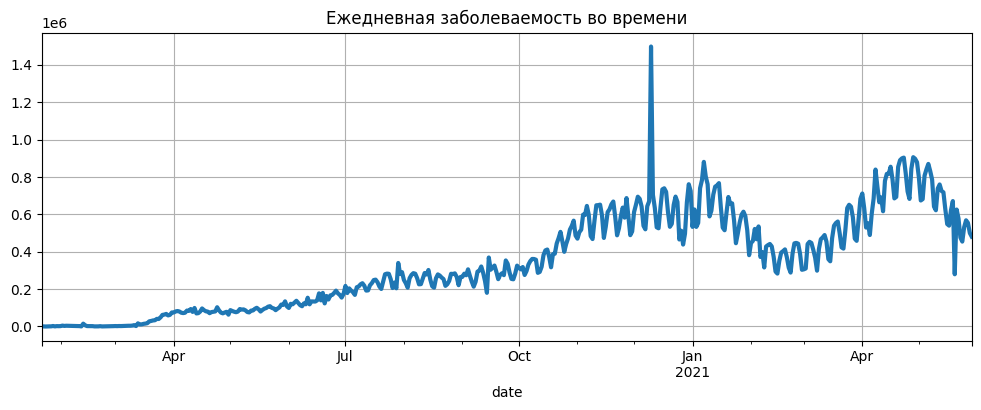

In [29]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость во времени',
    grid = True,
    lw=3
);

<b> Примечание </b>. Обратите внимание, что мы не использовали параметры x и y. Это связано с тем, что в нашем случае переменная grouped_cases — это объект Series.

plot() может являться методом объекта типа DataFrame или Series. При типе DataFrame требуется указать х и у, либо будут построены графики всех столбцов. При типе Series в этом нет необходимости, ведь это и так всего один столбец данных (у) с индексами (х).

При этом по оси абсцисс (х) откладываются индексы (на сгруппированных данных grouped_cases индексы — это даты), а по оси ординат (у) — значения показателей.

Здесь и далее в модуле точка с запятой в последней строке кода используется во избежание вывода на экран служебной информации в ноутбуке (попробуйте её убрать и посмотрите, что будет).

Теперь построим <b> гистограмму </b>, которая покажет распределение ежедневной заболеваемости во всём мире. Для этого параметр kind выставляем на значение 'hist'. Параметр bins (корзины) отвечает за число прямоугольников в гистограмме — пусть их будет 10 (попробуйте использовать другие числа, чтобы увидеть разницу).

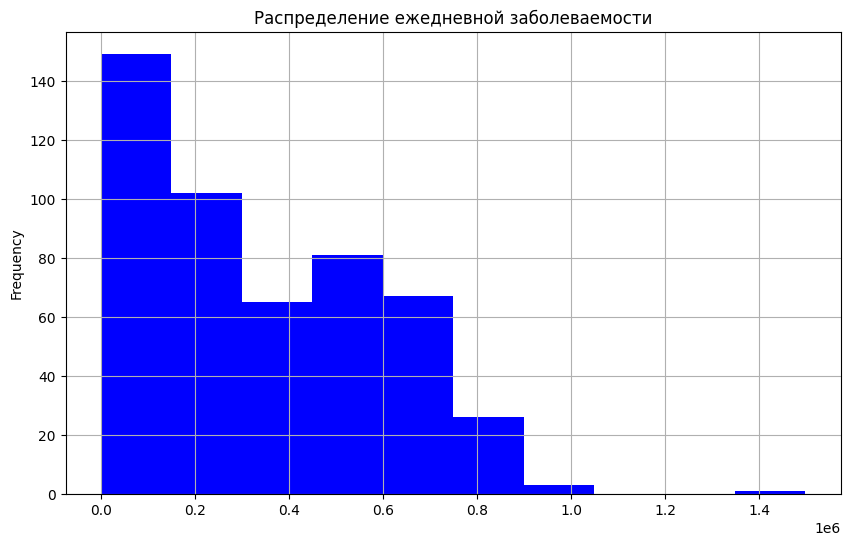

In [33]:
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'blue',
    bins=10
);

По гистограмме можно судить о частоте попадания ежедневной заболеваемости в определённый интервал. На оси абсцисс отложен диапазон ежедневной заболеваемости (в млн человек), разбитый на десять равных интервалов, на оси ординат — число наблюдений, попавших в этот интервал.

Мы видим модальное значение около нуля (от 0 до примерно 150 тыс. заболеваний в день), то есть большинство наблюдений сосредоточено в первом интервале, далее частота постепенно падает. Это связано с тем, что долгое время распространение вируса было довольно слабым.
В глаза бросается «пенёк», соответствующий резкой вспышке заболеваемости, которую мы видели ранее. Его высота очень мала, ведь такое наблюдение единственное. Даже на гистограмме кажется, что данное наблюдение является аномальным и, скорее всего, представляет собой выброс.

Давайте построим <b> столбчатую </b> диаграмму, которая покажет ТОП-10 стран по суммарной заболеваемости.

Для этого сгруппируем данные по странам и вычислим последний зафиксированный показатель с помощью агрегирующего метода last() — он возвращает последнее значение в столбце DataFrame.

Для построения столбчатой диаграммы значение параметра kind выставляем на 'bar'. Параметр colormap отвечает за цветовую гамму графика.

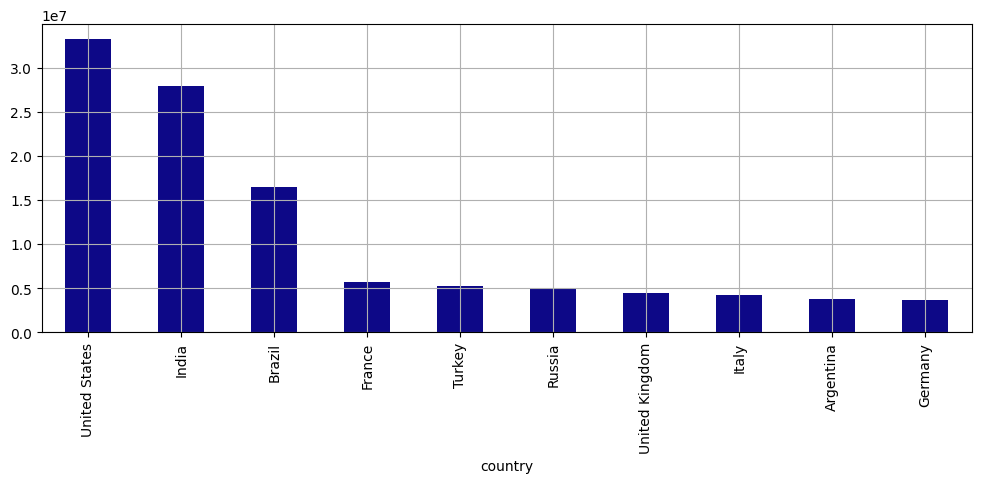

In [36]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

А теперь посмотрим, как в этих десяти странах соотносится количество заболевших и умерших от вируса. Для этого отобразим сразу два показателя на столбчатой <b> диаграмме </b>: 

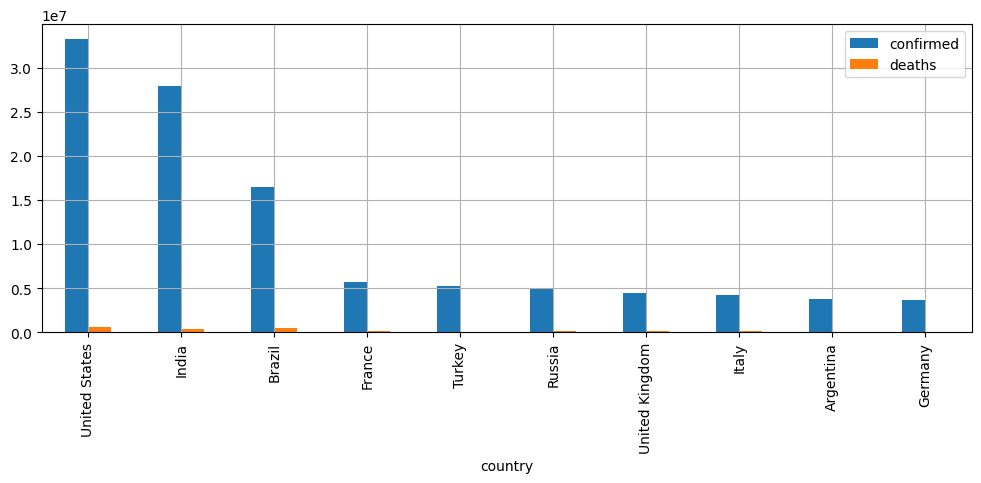

In [37]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed'])
grouped_country.plot(     kind='bar',     grid=True,     figsize=(12, 4), );

Этот график является небольшим усовершенствованием предыдущего. Теперь на нём можно увидеть соотношение зафиксированных случаев заражения и смертей.

Очевидно, что отношение числа умерших к числу заболевших весьма низкое. Также это может косвенно говорить о разных методиках учёта заболевших (например, какие-то страны могут учитывать заболевших только по мазку, в то время как другие — по клинической картине, учитывающей и другие показатели). То есть с методической точки зрения учёт по числу заражений может быть не совсем корректным. Лучшим показателем будет являться число смертей (хотя и этот метод не идеален).

Более того, если построить график с сортировкой не по числу заболевших, а по числу умерших, поменяются и места, и страны в рейтинге. Попробуйте построить такой график сами!

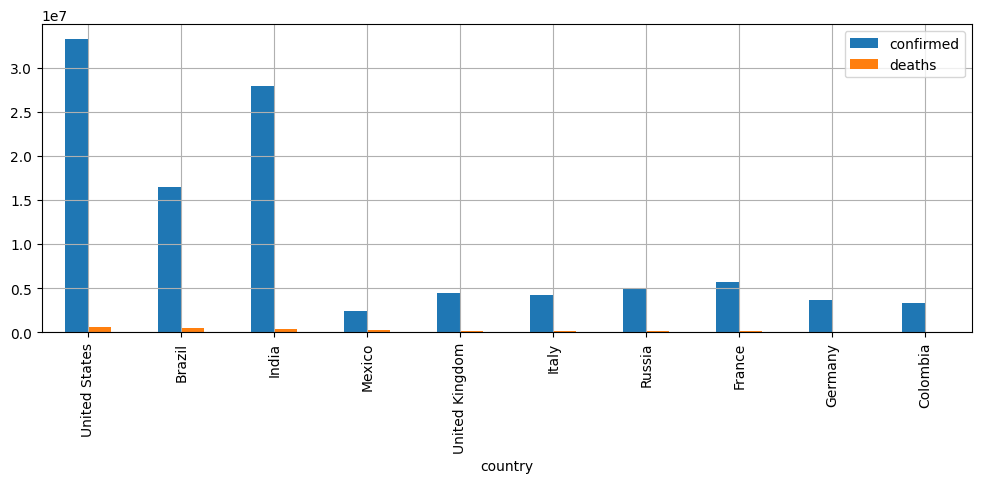

In [38]:
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['deaths'])
grouped_country.plot(     kind='bar',     grid=True,     figsize=(12, 4), );

Визуализация с помощью Pandas является удобным инструментом, когда графики необходимо построить «здесь и сейчас», не сильно заботясь об их внешнем виде. Однако такой подход имеет значительный минус по сравнению с использованием специализированных библиотек для визуализации — довольно ограниченный функционал:

- С помощью Pandas можно построить лишь базовый набор диаграмм. Для построения более сложных видов визуализации Pandas не подходит.
- Трудно настроить визуализацию нескольких видов графиков одновременно в разных масштабах.
- Сложно (иногда и вовсе невозможно) корректировать внешний вид графика.
- Отсутствует 3D-визуализация.

### Задание 4.3  ###
С помощью какого из перечисленных ниже вариантов кода можно получить такой график?

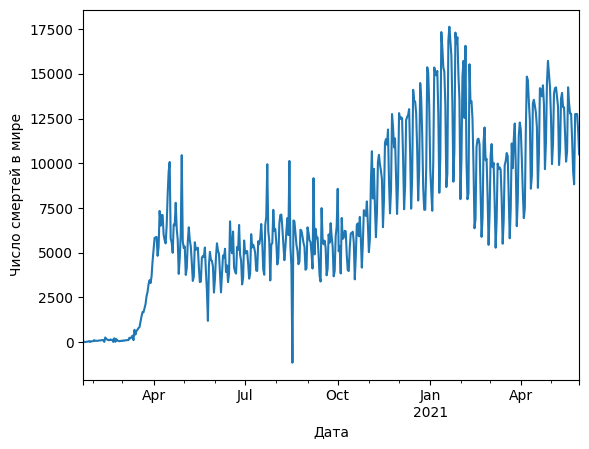

In [39]:
grouped_cases = covid_df.groupby('date')['daily_deaths'].sum()
grouped_cases.plot(kind='line',xlabel='Дата', ylabel='Число смертей в мире');

### Задание 4.4 ###
С помощью какого из перечисленных ниже вариантов кода можно построить столбчатую диаграмму для пяти стран с наименьшим общим числом вакцинаций на последний день рассматриваемого периода (total_vaccinations)?

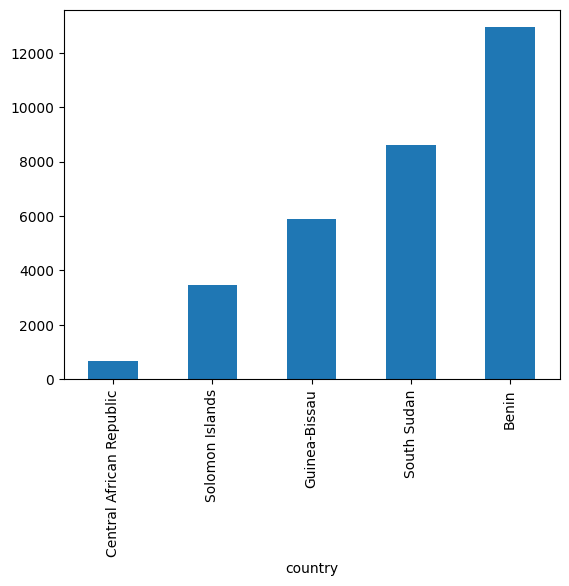

In [40]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');

#  5. Графические возможности библиотеки Matplotlib #

Matplotlib — это библиотека Python, обладающая большим количеством возможностей для визуализации и настройки отображения графиков и диаграмм.

Для установки библиотеки введите в командную строку (или командную строку Anaconda) следующее:

pip install matplotlib

За визуализацию графиков в Matplotlib отвечает модуль pyplot. Традиционно он импортируется под псевдонимом plt. Для более корректного отображения графиков в ноутбуках используется команда %matplotlib inline.

import matplotlib.pyplot as plt

%matplotlib inline

Примечание. Если вы используете тёмную тему в VS Code, то для корректного отображения графиков на тёмном фоне выполните следующую команду по установке стиля отображения:

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

Основные объекты matplotlib

Библиотека Matplotlib позволяет работать в нескольких режимах. Самый распространённый и мощный по функционалу — объектно-ориентированный режим. Он основан на работе с объектами фигур (figure, их ещё называют канвасами или холстами) и координатных плоскостей (axes, или системы координат). 

На рисунке ниже представлена визуализация основных компонентов графика в Matplotlib:

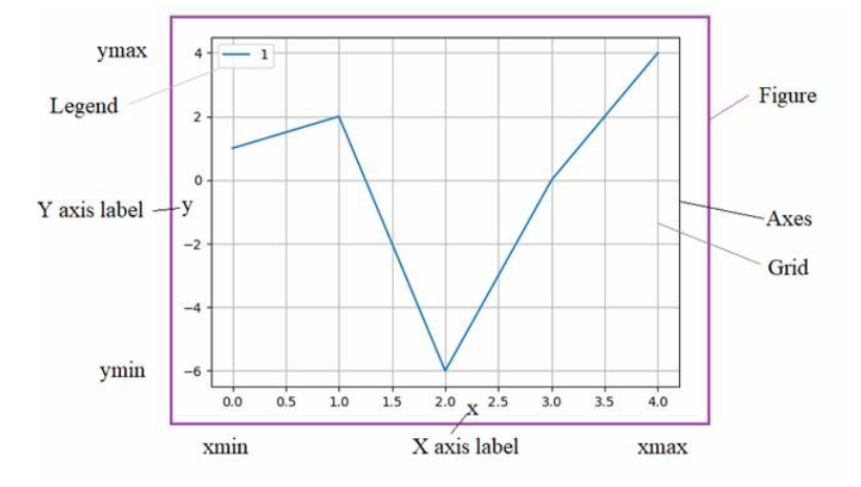

Процесс работы над графиком максимально прозрачен: сначала создаётся объект фигуры (fig) , содержащий необходимую информацию и настройки, например размер в дюймах (figsize, восемь дюймов в ширину, четыре — в высоту). К этому объекту с помощью метода add_axes() добавляется координатная плоскость, а на ней располагаются графические объекты. Для создания координатной плоскости необходимо указать её расположение на фигуре в виде списка из координат. В нашем случае она начинается в левом нижнем углу без отступов (координаты 0, 0) и занимает всё отведённое место в области (100%, ширина и высота равны 1).

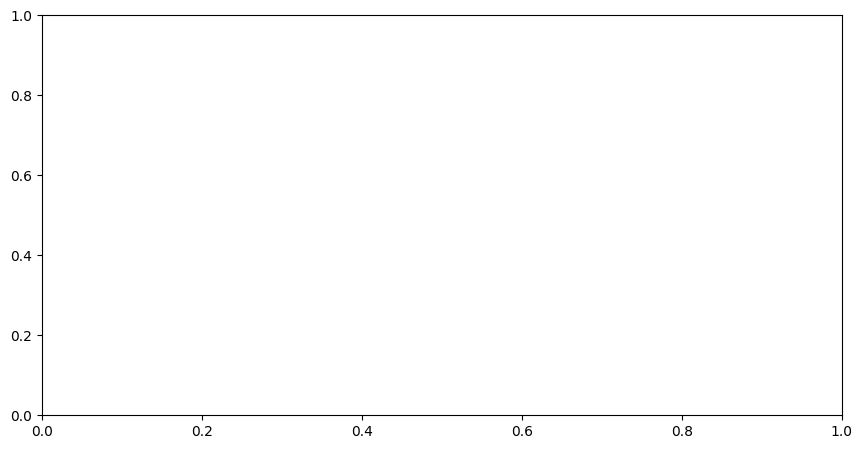

In [46]:
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])

еперь на созданной системе координат мы можем построить график. 

Утверждается, что коллективная вакцинация позволяет минимизировать риск заражения коронавирусной инфекцией (но только после второго компонента). Давайте проверим это на примере США: построим диаграмму рассеяния, которая покажет зависимость числа ежедневно обнаруживаемых случаев заражения (daily_confirmed) от общего количества привитых вторым компонентом вакцины (people_fully_vaccinated) в США.

У объекта координатной плоскости axes вызовем метод scatter().

Основные параметры метода scatter()

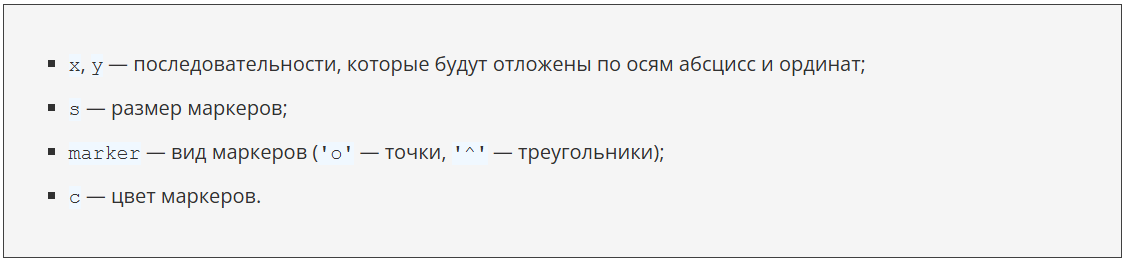

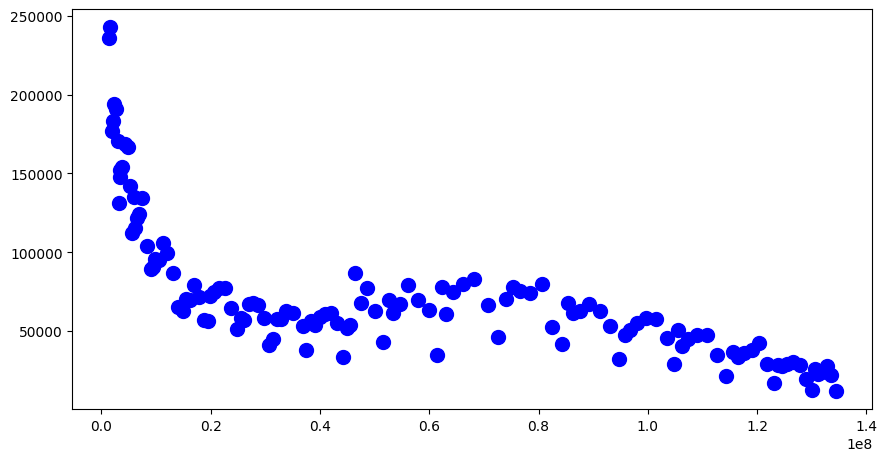

In [47]:
us_data = covid_df[covid_df['country'] == 'United States']

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'], 
    y=us_data['daily_confirmed'], 
    s=100,
    marker='o',
    c = 'blue'
);

Основные параметры метода pie()

ТОП-10 комбинаций вакцин (vaccines) по распространённости мы находим с помощью метода value_counts(). Круговую диаграмму строим на полученных значениях, метки для каждого значения — индексы промежуточной таблицы. Будем отображать доли в процентах и округлять их до одного знака после запятой. Самую распространённую вакцину сместим на 10 % от центра:

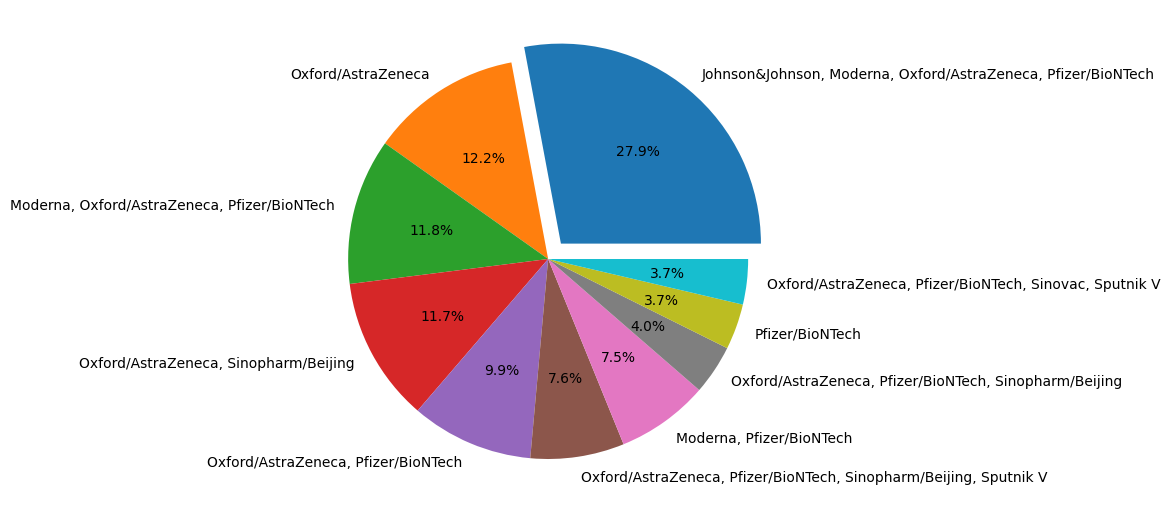

In [48]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);

### Добавление информативности в графики ###

Вы, наверное, заметили, что до этого мы не подписывали графики. График не имеет смысла, если без лишних слов непонятно, что на нём изображено. Управлять информативностью графика можно с помощью методов координатной плоскости axes. Перечислим основные из них (не пугайтесь, запоминать их не обязательно — вы всегда сможете подсмотреть их в документации):

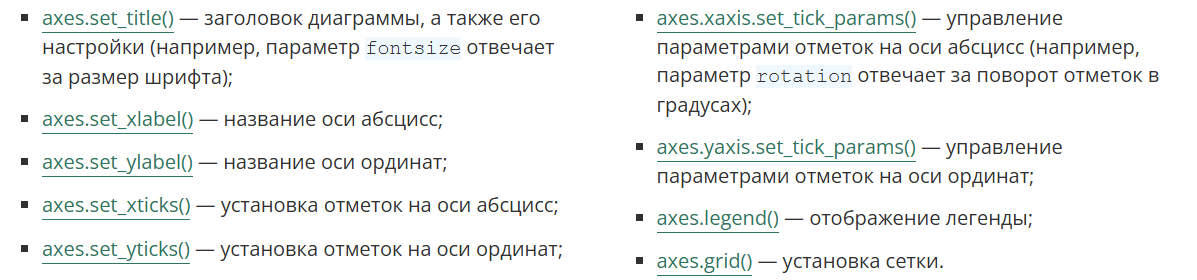

Например, изобразим на одном графике, как росла общая заболеваемость (confirmed), число зафиксированных смертей (deaths), выздоровевших пациентов (recovered) и активных случаев (active) в Китае.

Для построения линейных графиков в Matplotlib используется метод plot() (не путайте с методом plot() в Pandas!). При вызове метода без параметров по оси ординат откладываются значения столбца таблицы, по оси абсцисс — индексы (в нашем случае это будут даты). 

Дополнительно в параметрах метода указываем параметр label — название графика, которое будет отображаться на легенде, а также lw — ширину линии графика. Добавим к графику заголовок, названия осей, установим метки по оси y с частотой в 10 000, повернём метки по оси x на 30 градусов, а также добавим легенду (метки для легенды выставляются в параметре label метода plot()):

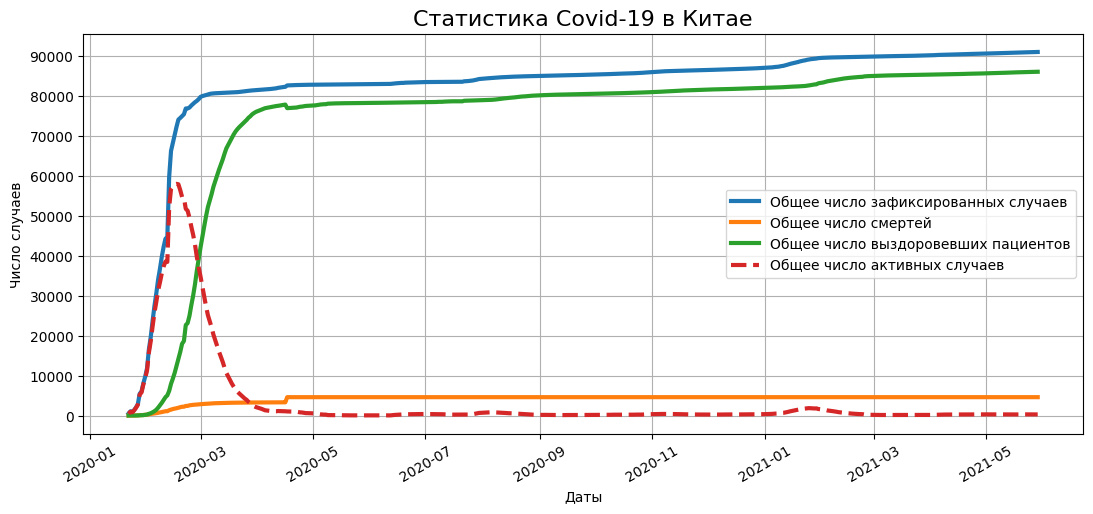

In [49]:
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

### Использование нескольких систем координат ###

При использовании библиотеки Matplotlib вовсе не обязательно ограничиваться одной системой координат.

→ Вы можете размещать несколько систем координат на одной фигуре, что позволит нам отображать вспомогательную информацию на основном графике.

Для добавления второй системы координат необходимо повторно применить к объекту fig метод add_axes, указав новое имя для второй системы координат.

Например, отобразим ТОП-5 стран по общему числу привитых вторым компонентом людей (people_fully_vaccinated), а также ТОП-5 стран по числу полностью привитых на 100 человек населения (people_fully_vaccinated_per_hundred).

Для этого построим столбчатые диаграммы с помощью метода bar().

Основные параметры метода bar()

Группируем таблицу по странам, находим последний по дате зафиксированный показатель с помощью метода last() и выбираем ТОП-5 стран с использованием метода nlargest().

При отображении графиков создаём две координатные плоскости main_axes и insert_axes, на каждой из них отдельно строим столбчатые диаграммы.

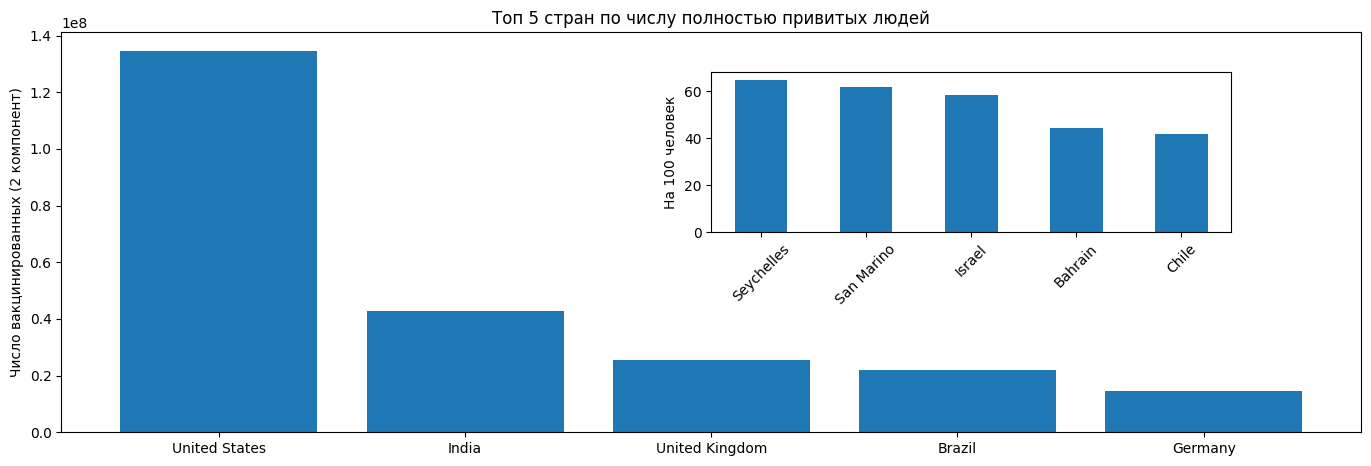

In [53]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = vacc_country.index, height = vacc_country);
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.5, 0.5, 0.4, 0.4])
insert_axes.bar(x = vacc_country_per_hundred.index, height = vacc_country_per_hundred, width=0.5);
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

### Subplots ###

Создание дополнительных систем координат с помощью метода add_axes() полезно, однако используется не так часто.

В большинстве случаев для отображения нескольких систем координат используется функция subplots(). Она создаёт целую таблицу из систем координат на одной фигуре. Функция возвращает новую фигуру, а также список координатных плоскостей.

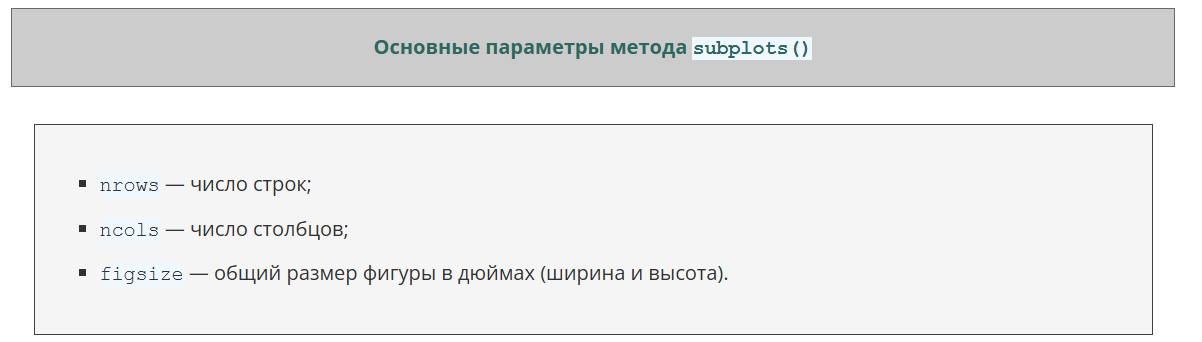

Например, следующий код создаст шесть координатных плоскостей, сведённых в таблицу размера 2x3:

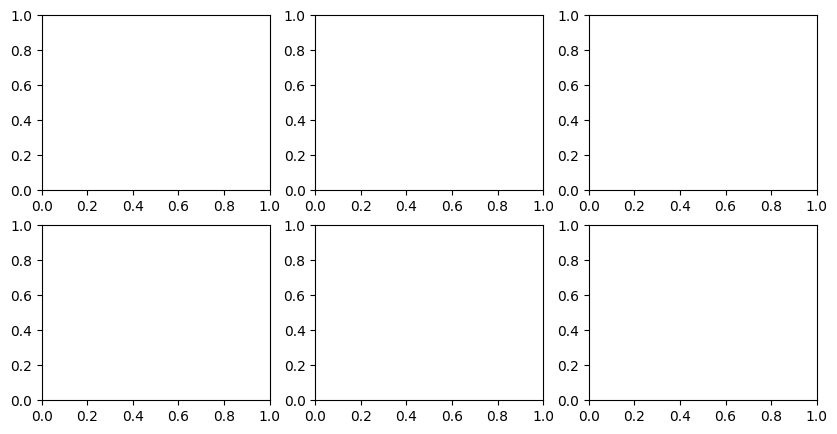

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

Теперь, обладая знаниями о методе subplots(), построим три графика:

- Столбчатую диаграмму, которая покажет динамику ежедневной вакцинации в России.
- Линейный график изменения ежедневной заболеваемости в стране.
- Гистограмму ежедневной заболеваемости в стране.

За построение гистограмм в библиотеке Matplotlib отвечает метод hist().

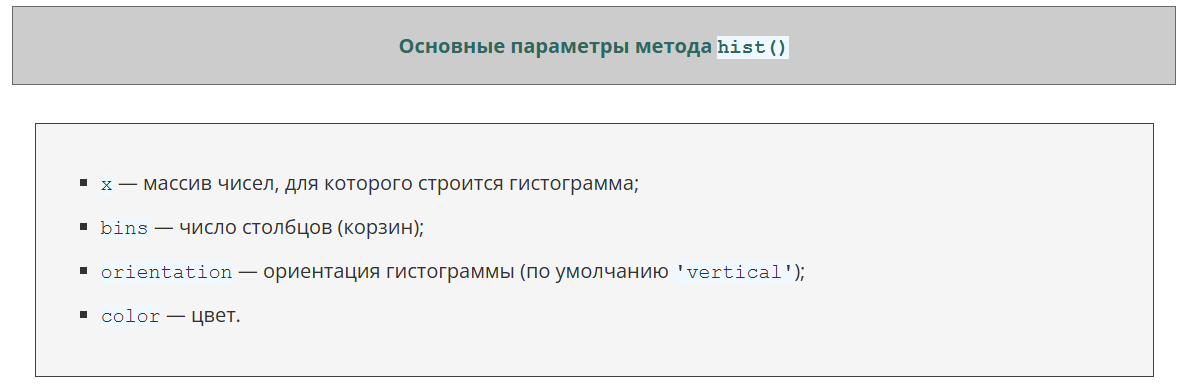

Фильтруем таблицу covid_df по признаку страны и выбираем записи только для России.

Для того чтобы отобразить график в соответствующей координатной плоскости, нужно обратиться к списку axes по индексу (от 0 до 2). Дальнейшая настройка графиков вам уже известна.

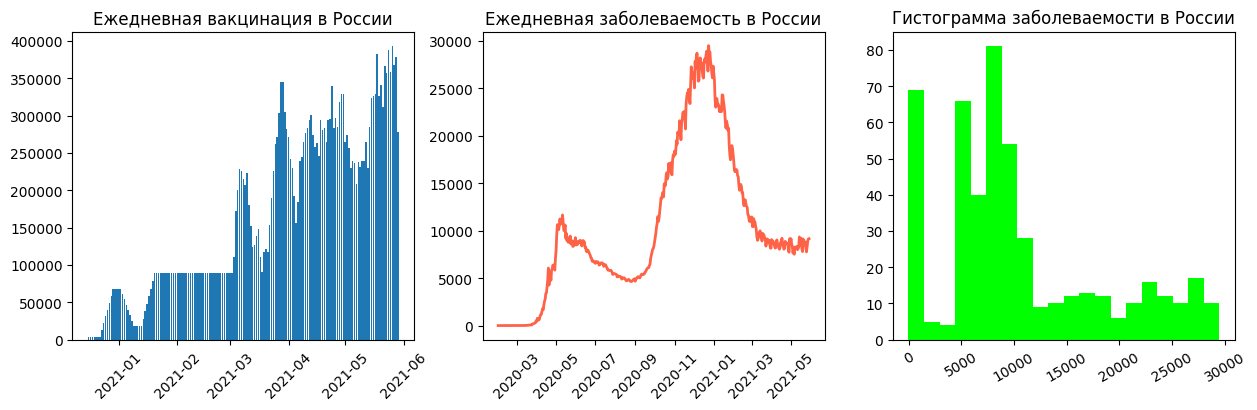

In [55]:
russia_data = covid_df[covid_df["country"] == "Russia"]

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

# столбчатая диаграмма
axes[0].bar(
    x=russia_data["date"],
    height=russia_data["daily_vaccinations"],
    label="Число вакцинированных",
)
axes[0].set_title("Ежедневная вакцинация в России")
axes[0].xaxis.set_tick_params(rotation=45)

# линейный график
axes[1].plot(
    russia_data["date"],
    russia_data["daily_confirmed"],
    label="Число заболевших",
    color="tomato",
    lw=2,
)
axes[1].set_title("Ежедневная заболеваемость в России")
axes[1].xaxis.set_tick_params(rotation=45)

# гистограмма
axes[2].hist(
    x=russia_data["daily_confirmed"], label=["Число заболевших"], color="lime", bins=20
)
axes[2].set_title("Гистограмма заболеваемости в России")
axes[2].xaxis.set_tick_params(rotation=30)

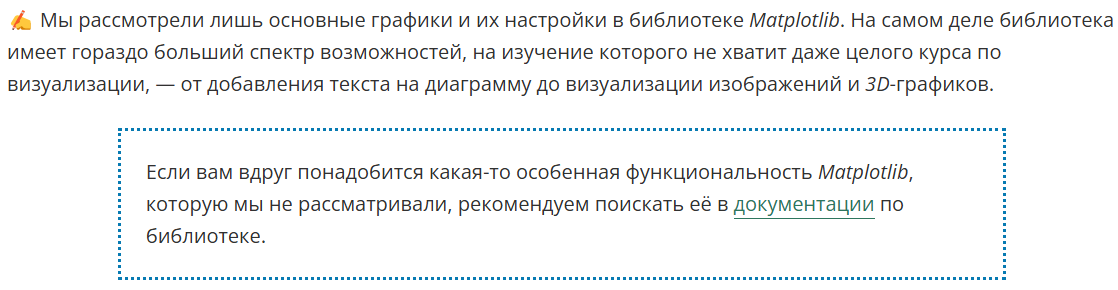

#### link: #### 
https://matplotlib.org/

Также стоит отметить, что, помимо объектно-ориентированного подхода в работе с библиотекой Matplotlib, вы можете встретить и модульный подход.

Модульный подход основан на обращении к модулю pyplot (plt) напрямую, а не средствами объектов фигур и плоскостей. Например, следующий код строит столбчатую диаграмму: по оси x откладываются элементы списка names (названия групп), а высоту столбцов определяет список values.

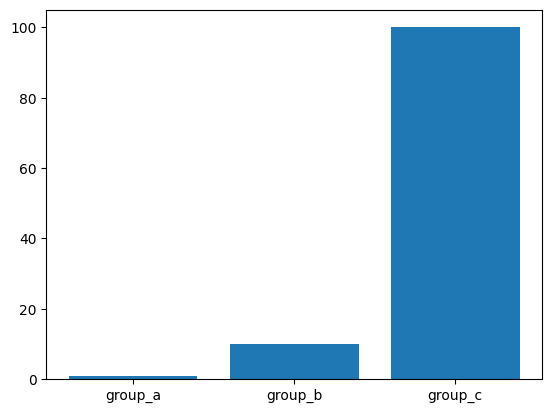

In [56]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]
plt.bar(names, values)
plt.show()

И модульный, и объектно-ориентированный подходы имеют одинаковое право на существование. Ознакомьтесь со статьёй, где используется преимущественно модульный подход, и проведите параллель с изученным материалом.

https://pythonim.ru/libraries/biblioteka-matplotlib-v-python

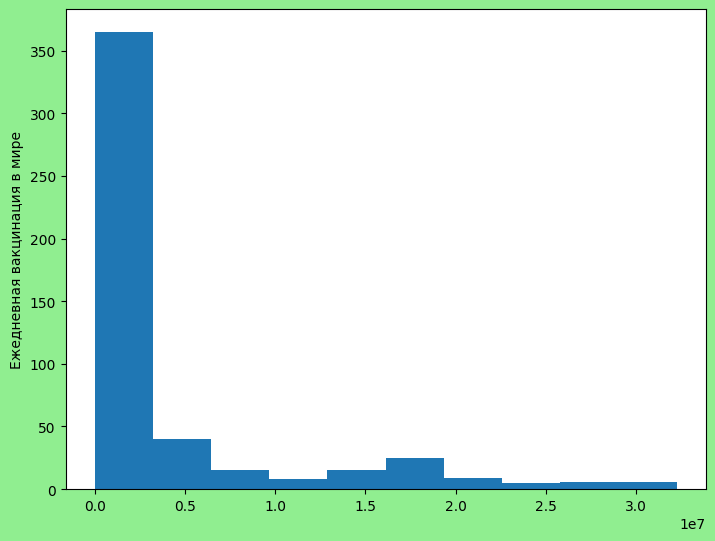

In [57]:
fig = plt.figure(facecolor='lightgreen')
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(covid_df.groupby('date')['daily_vaccinations'].sum())
axes.set_ylabel('Ежедневная вакцинация в мире');

Seaborn — надстройка над библиотекой Matplotlib, которая значительно расширяет её возможности, позволяя создавать графики более высокого уровня с эстетичным оформлением. Библиотека предоставляет большое количество дополнительных опций для творчества при визуализации данных.

In [2]:
#pip install seaborn
import seaborn as sns
print(sns.__version__)

0.13.2


### 7. Графические возможности библиотеки Plotly ###

→ Библиотека Plotly позволяет строить интерактивные графики, которые можно приближать, отдалять, а также просматривать значения на графике в реальном времени. К тому же в библиотеке собрано огромнейшее количество красочных методов визуализации. У Plotly приятный дизайн, а способов работы с ней несколько.

→ С помощью Plotly можно делать сложные визуализации с элементами управления, например строить интерактивную 3D-визуализацию, карту мира и многое другое.

In [ ]:
#!pip install plotly


Библиотека нуждается в дополнительной установке. Для этого введите в командной строке (или командной строке Anaconda) следующее:

In [11]:
#pip install --upgrade nbformat

Из библиотеки нам понадобятся модуль express, он традиционно импортируется под псевдонимом px.

Также импортируем саму библиотеку, чтобы можно было вывести её версию:

In [13]:
import plotly
import plotly.express as px
print(plotly.__version__)

6.1.2


Экспресс-режим

Plotly позволяет строить графики в нескольких режимах. Мы рассмотрим самый новый и подающий надежды — экспресс-режим. Его функциональность скромнее, чем у полного режима Plotly, но нам её будет более чем достаточно. Для работы в экспресс-режиме предназначен модуль plotly.express. Он был выпущен в марте 2019 года и находится в процессе активной разработки.

→ Работа с plotly.express напоминает работу с библиотекой Seaborn. Отличие лишь в том, что все настройки графика (размеры, подписи осей, текста на графике) прописываются в самом методе.

С помощью экспресс-режима (px) можно строить уже знакомые нам графики:

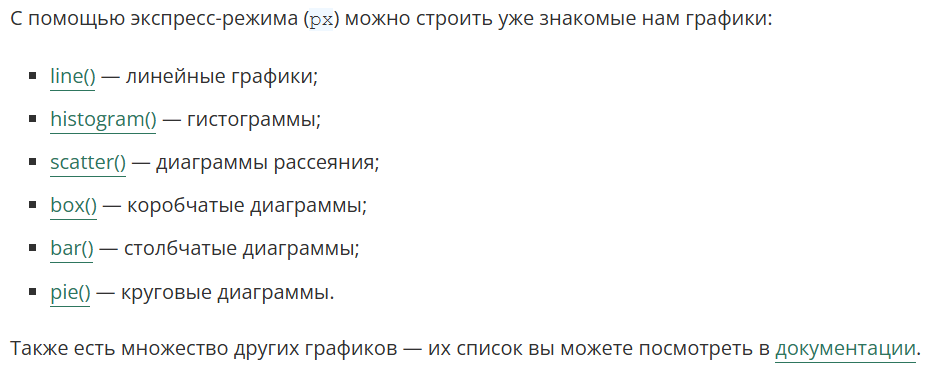

### 8. Искусство визуализации ###

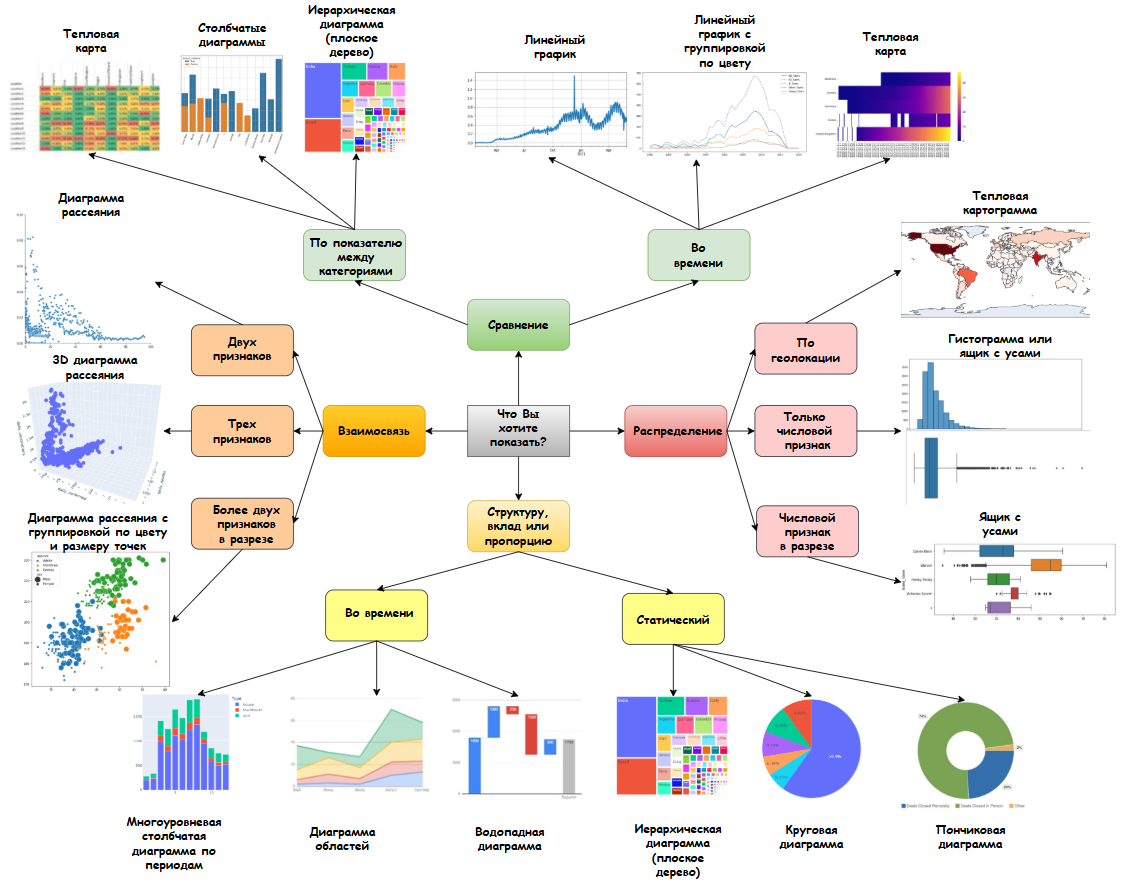